<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
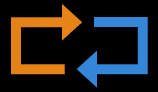

In [1]:
# importing the required libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# Define the URL of the website to be scraped
url = "https://www.billboard.com/charts/hot-100/"

# Make a request to the URL and store the response
response = requests.get(url, headers={'Accept-Language': 'en-US'})

# Create a BeautifulSoup object to parse the HTML content of the URL
soup = BeautifulSoup(response.content, 'html.parser')

# Print the prettified HTML content of the URL
print(soup.prettify())

# Get the first song title
soup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

# Get the first artist name
soup.select('span.c-label.a-no-trucate')[0].get_text(strip=True)

# Create empty lists to store song titles and artists
title = []
artists = []

# Get the number of songs
len_songs = len(soup.select('h3.c-title.a-no-trucate'))

# Loop through all songs and store the title and artist in the respective lists
for i in range(len_songs):
    title.append(soup.select('h3.c-title.a-no-trucate')[i].get_text(strip=True))
    artists.append(soup.select('span.c-label.a-no-trucate')[i].get_text(strip=True))

# Create a Pandas DataFrame with the song titles and artists
songs = pd.DataFrame({'Song_title': title, 'Artists': artists})

# Print the DataFrame
print(songs)

# Add a 'Rank' column to the DataFrame with values ranging from 1 to the number of songs
songs['Rank'] = np.arange(len(songs)) + 1

# Print the updated DataFrame

In [2]:
songs

,Song_title,Artists,Rank
0,Flowers,Miley Cyrus,1
1,Kill Bill,SZA,2
2,Anti-Hero,Taylor Swift,3
3,Creepin',"Metro Boomin, The Weeknd & 21 Savage",4
4,Unholy,Sam Smith & Kim Petras,5
...,...,...,...
95,Do It Again,NLE Choppa & 2Rare,96
96,Miss You,Oliver Tree & Robin Schulz,97
97,Back End,Finesse2Tymes,98
98,Open Arms,SZA Featuring Travis Scott,99


In [4]:
# Taking user input for the Song Title
input_song= input('what song do you like? ')
lower_song=input_song.lower()

# Checking if the user input exists in the DataFrame
if lower_song in songs['Song_title'].values:
    print ('This is a hot song')
else:
    print('This is not a hot song or does not match with the top 100, but we suggest you these other hot songs: \n')
    # Displaying 5 random song titles from the DataFrame if the user input does not exist
    display(songs[['Song_title','Rank']].sample(n=5, random_state=3))

what song do you like?  ldk


This is not a hot song or does not match with the top 100, but we suggest you these other hot songs: 



,Song_title,Rank
93,California Breeze,94
67,Snap,68
6,Die For You,7
64,No Se Va,65
96,Miss You,97


In [20]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

In [21]:
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [22]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [23]:
playlist=sp.user_playlist_tracks('PMB Music','69tUdeFaKRDVTg2guSDttx')


In [24]:
playlist.keys()


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [25]:
playlist['items'][4]['track']['id']


'7oWqXVRExRlNR0jZJNoO9w'

In [26]:
playlist['total']


1038

In [27]:
len(playlist['items'])


100

In [28]:
# user_id='Bradnumber1'
# playlist_id='1YL4XoegERoragv0RK2RC9'

In [29]:
user_id='PMB Music'
playlist_id='69tUdeFaKRDVTg2guSDttx'

In [30]:
def get_playlist_tracks(user_id,playlist_id):
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [31]:
full_track_ids=get_playlist_tracks(user_id,playlist_id)


In [32]:
len(full_track_ids)


1038

In [33]:
full_track_ids[0].keys()


dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [34]:
full_track_ids[0]['track'].keys()


dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [35]:
full_track_ids[0]['track']['name']


'Original Sin'

In [36]:
full_track_ids[0]['track']['artists'][0]['name']


'INXS'

In [37]:
full_track_ids[0]['track']['id']


'7pSzRRMaPXA39wvrnvdmSH'

In [38]:
title=[]
artist=[]
song_id=[]

for i in full_track_ids:
    title.append(i['track']['name'])
    artist.append(i['track']['artists'][0]['name'])
    song_id.append(i['track']['id'])

In [39]:
playlist_df=pd.DataFrame({'title': title, 'artist': artist, 'song_id': song_id})


In [40]:
playlist_df


,title,artist,song_id
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w
...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1


In [41]:
spaceplaylist=[]
for i in range(len(playlist_df)):
    spaceplaylist.extend(sp.audio_features(tracks=playlist_df['song_id'][i]))

In [42]:
song_features=pd.DataFrame.from_dict(spaceplaylist)


In [43]:
song_features


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,audio_features,7pSzRRMaPXA39wvrnvdmSH,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,audio_features,07zkNvtcmPOFlMOXbma13k,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,audio_features,603aPXFY2Ec2WuFganUGuD,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,audio_features,6i8ecOsx4J2Px1maiqzqoG,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,audio_features,7oWqXVRExRlNR0jZJNoO9w,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,audio_features,2QlYQQ8JpZf8mAk7PWcXsB,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,audio_features,59JOneFVktVPSm0agaQWDo,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,audio_features,7p1wyDdcnJuwQDodZh1Duq,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,audio_features,7jgfLVXTBxufrbccakHQi1,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [44]:
playlist_features = playlist_df.merge(song_features, left_on='song_id', right_on='id')


In [45]:
playlist_features


,title,artist,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,...,0.0935,0.731,131.397,audio_features,7pSzRRMaPXA39wvrnvdmSH,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,...,0.0454,0.790,121.242,audio_features,07zkNvtcmPOFlMOXbma13k,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,...,0.1050,0.648,111.290,audio_features,603aPXFY2Ec2WuFganUGuD,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,...,0.1150,0.764,114.846,audio_features,6i8ecOsx4J2Px1maiqzqoG,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,...,0.1010,0.602,95.997,audio_features,7oWqXVRExRlNR0jZJNoO9w,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,...,0.1420,0.589,129.678,audio_features,2QlYQQ8JpZf8mAk7PWcXsB,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,...,0.0951,0.848,126.866,audio_features,59JOneFVktVPSm0agaQWDo,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,...,0.2650,0.648,142.393,audio_features,7p1wyDdcnJuwQDodZh1Duq,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,...,0.0840,0.734,125.755,audio_features,7jgfLVXTBxufrbccakHQi1,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [46]:
playlist_features=playlist_features.drop(['id'],axis=1)


In [47]:
# ingredients
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [48]:
playlist_features.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1038 non-null   object 
 1   artist            1038 non-null   object 
 2   song_id           1038 non-null   object 
 3   danceability      1038 non-null   float64
 4   energy            1038 non-null   float64
 5   key               1038 non-null   int64  
 6   loudness          1038 non-null   float64
 7   mode              1038 non-null   int64  
 8   speechiness       1038 non-null   float64
 9   acousticness      1038 non-null   float64
 10  instrumentalness  1038 non-null   float64
 11  liveness          1038 non-null   float64
 12  valence           1038 non-null   float64
 13  tempo             1038 non-null   float64
 14  type              1038 non-null   object 
 15  uri               1038 non-null   object 
 16  track_href        1038 non-null   object 


In [49]:
playlist_features.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.632296,0.687339,5.324663,-9.279781,0.699422,0.046271,0.172357,0.051059,0.172441,0.667612,122.128461,256884.836224,3.993256
std,0.133206,0.182735,3.614445,3.338145,0.458730,0.038632,0.190307,0.152257,0.148771,0.227751,23.690125,58412.013047,0.102772
min,0.147000,0.160000,0.000000,-22.597000,0.000000,0.021500,0.000005,0.000000,0.016500,0.050500,56.832000,122760.000000,3.000000
25%,0.546250,0.557250,2.000000,-11.725750,0.000000,0.031100,0.026850,0.000004,0.075875,0.510250,108.016500,221096.500000,4.000000
50%,0.639000,0.711000,5.000000,-8.857000,1.000000,0.037500,0.102500,0.000212,0.114500,0.709500,120.251000,245553.000000,4.000000
75%,0.726750,0.833750,9.000000,-6.687750,1.000000,0.048900,0.254500,0.008310,0.242000,0.857000,132.717000,281169.750000,4.000000
max,0.968000,0.991000,11.000000,-2.658000,1.000000,0.934000,0.941000,0.927000,0.988000,0.985000,205.218000,730800.000000,5.000000


In [50]:
cluster_df=playlist_features.drop(['title','artist','type','uri','track_href','analysis_url'],axis=1)


In [51]:
cluster_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           1038 non-null   object 
 1   danceability      1038 non-null   float64
 2   energy            1038 non-null   float64
 3   key               1038 non-null   int64  
 4   loudness          1038 non-null   float64
 5   mode              1038 non-null   int64  
 6   speechiness       1038 non-null   float64
 7   acousticness      1038 non-null   float64
 8   instrumentalness  1038 non-null   float64
 9   liveness          1038 non-null   float64
 10  valence           1038 non-null   float64
 11  tempo             1038 non-null   float64
 12  duration_ms       1038 non-null   int64  
 13  time_signature    1038 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 121.6+ KB


In [52]:
cluster_df.index=cluster_df.iloc[:,0]


In [53]:
cluster_df


,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_id,,,,,,,,,,,,,,
7pSzRRMaPXA39wvrnvdmSH,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,317240,4
07zkNvtcmPOFlMOXbma13k,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,264947,4
603aPXFY2Ec2WuFganUGuD,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,260867,4
6i8ecOsx4J2Px1maiqzqoG,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,222733,4
7oWqXVRExRlNR0jZJNoO9w,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2QlYQQ8JpZf8mAk7PWcXsB,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,140693,4
59JOneFVktVPSm0agaQWDo,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,181400,4
7p1wyDdcnJuwQDodZh1Duq,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,240573,4


In [54]:
cluster_df=cluster_df.iloc[:,1:14]
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_id,,,,,,,,,,,,,
7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,317240,4
07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,264947,4
603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,260867,4
6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,222733,4
7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,140693,4
59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,181400,4
7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,240573,4


In [55]:
cluster_df.rename_axis(None, inplace=True)
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,317240,4
07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,264947,4
603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,260867,4
6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,222733,4
7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,140693,4
59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,181400,4
7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,240573,4
7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,192973,4


In [56]:
K_Means=KMeans(n_clusters=5, random_state=5)
cluster_model_nonscaled=K_Means.fit(cluster_df)
cluster_model_nonscaled.cluster_centers_

array([[ 6.28376923e-01,  6.77034615e-01,  5.43846154e+00,
        -9.43533462e+00,  6.57692308e-01,  4.32034615e-02,
         1.68546485e-01,  3.38214625e-02,  1.79388846e-01,
         6.50317308e-01,  1.23136550e+02,  2.82013142e+05,
         3.99230769e+00],
       [ 5.95327273e-01,  6.54736364e-01,  5.24545455e+00,
        -9.68935455e+00,  6.63636364e-01,  4.91936364e-02,
         1.85671764e-01,  6.26100946e-02,  1.59852727e-01,
         5.85946364e-01,  1.17494718e+02,  3.46200755e+05,
         3.99090909e+00],
       [ 6.39630588e-01,  6.82397647e-01,  5.39058824e+00,
        -9.21416941e+00,  7.15294118e-01,  4.27242353e-02,
         1.71785895e-01,  4.83575610e-02,  1.69781647e-01,
         6.71717882e-01,  1.20841155e+02,  2.37969781e+05,
         3.99764706e+00],
       [ 7.01227273e-01,  6.27681818e-01,  5.36363636e+00,
        -1.06832727e+01,  5.90909091e-01,  5.23500000e-02,
         1.11954164e-01,  1.17604626e-01,  1.51413636e-01,
         6.43272727e-01,  1.13752500e

In [57]:
cluster_model_nonscaled.labels_


array([1, 0, 0, ..., 2, 4, 2], dtype=int32)

In [58]:
cluster_df['cluster_no_sc']=cluster_model_nonscaled.labels_


In [59]:
cluster_df['cluster_no_sc'].value_counts()


2    424
0    260
4    222
1    110
3     22
Name: cluster_no_sc, dtype: int64

In [60]:
cluster_df.head(1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_no_sc
7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.0136,0.000106,0.0935,0.731,131.397,317240,4,1


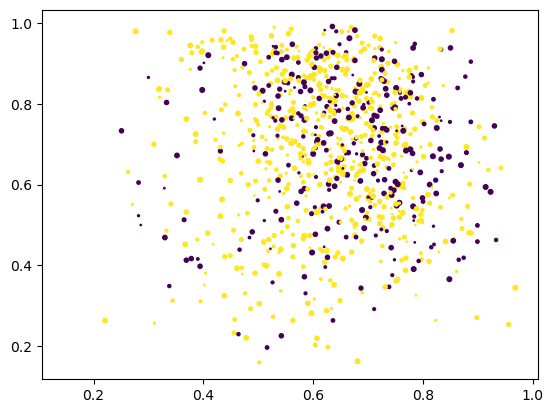

In [61]:
plt.scatter(cluster_df.iloc[:,0], cluster_df.iloc[:,1], cluster_df.iloc[:,2], cluster_df.iloc[:,4]);


In [62]:
cluster_df=cluster_df.drop('cluster_no_sc',axis=1)


In [63]:
#Scaling
cluster_df_copy=cluster_df
cluster_scaled=K_Means.fit(cluster_df_copy)
cluster_df_copy['cluster_sc']=cluster_scaled.labels_

In [64]:
scaler=StandardScaler()
scaler.fit(cluster_df_copy)
scaler.mean_

array([ 6.32295761e-01,  6.87339114e-01,  5.32466281e+00, -9.27978131e+00,
        6.99421965e-01,  4.62708092e-02,  1.72356515e-01,  5.10592112e-02,
        1.72441233e-01,  6.67612428e-01,  1.22128461e+02,  2.56884836e+05,
        3.99325626e+00,  1.84200385e+00])

In [65]:
cluster_scaled=scaler.transform(cluster_df_copy)


In [66]:
cluster_scaled.shape


(1038, 14)

In [67]:
type(cluster_scaled)
cluster_scaled_df=pd.DataFrame(cluster_scaled,columns=['danceability' , 'energy' , 'key' , 'loudness' , 'mode' , 'speechiness' , 'acousticness' , 'instrumentalness' , 'liveness' , 'valence' , 'tempo' , 'duration_ms' , 'time_signature', 'cluster_sc'])
cluster_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_sc
0,0.395849,-0.297509,1.017337,0.605652,0.655555,-0.221964,-0.834617,-0.334815,-0.530878,0.278454,0.391429,1.033764,0.06565,-0.601489
1,0.778898,0.824874,-1.473872,0.703658,0.655555,0.679276,-0.825154,0.064007,-0.854350,0.537633,-0.037437,0.138089,0.06565,-1.315844
2,0.230612,-0.319409,-0.920270,-1.024181,0.655555,-0.524967,-0.466612,-0.076613,-0.453541,-0.086155,-0.457730,0.068207,0.06565,-1.315844
3,0.433403,-0.806687,-0.366668,-0.370510,0.655555,-0.377350,0.239958,-0.292340,-0.386291,0.423419,-0.307553,-0.584953,0.06565,0.112865
4,-0.460378,0.326646,-0.366668,0.386863,0.655555,-0.506839,-0.553882,-0.335394,-0.480441,-0.288227,-1.103585,0.131923,0.06565,-1.315844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.339137,1.449028,1.017337,0.102436,0.655555,0.189809,-0.827257,-0.218547,-0.204717,-0.345335,0.318832,-1.990136,0.06565,1.541574
1034,-0.542996,0.080269,1.570939,-0.158913,0.655555,-0.113194,-0.577539,-0.335511,-0.520118,0.792420,0.200076,-1.292906,0.06565,1.541574
1035,-0.820895,0.551122,-0.366668,-0.069599,0.655555,-0.338504,-0.865424,-0.335422,0.622456,-0.086155,0.855813,-0.279389,0.06565,0.112865
1036,-0.137415,1.262877,1.017337,0.644615,-1.525426,0.355554,-0.631688,0.223026,-0.594766,0.291632,0.153156,-1.094683,0.06565,1.541574


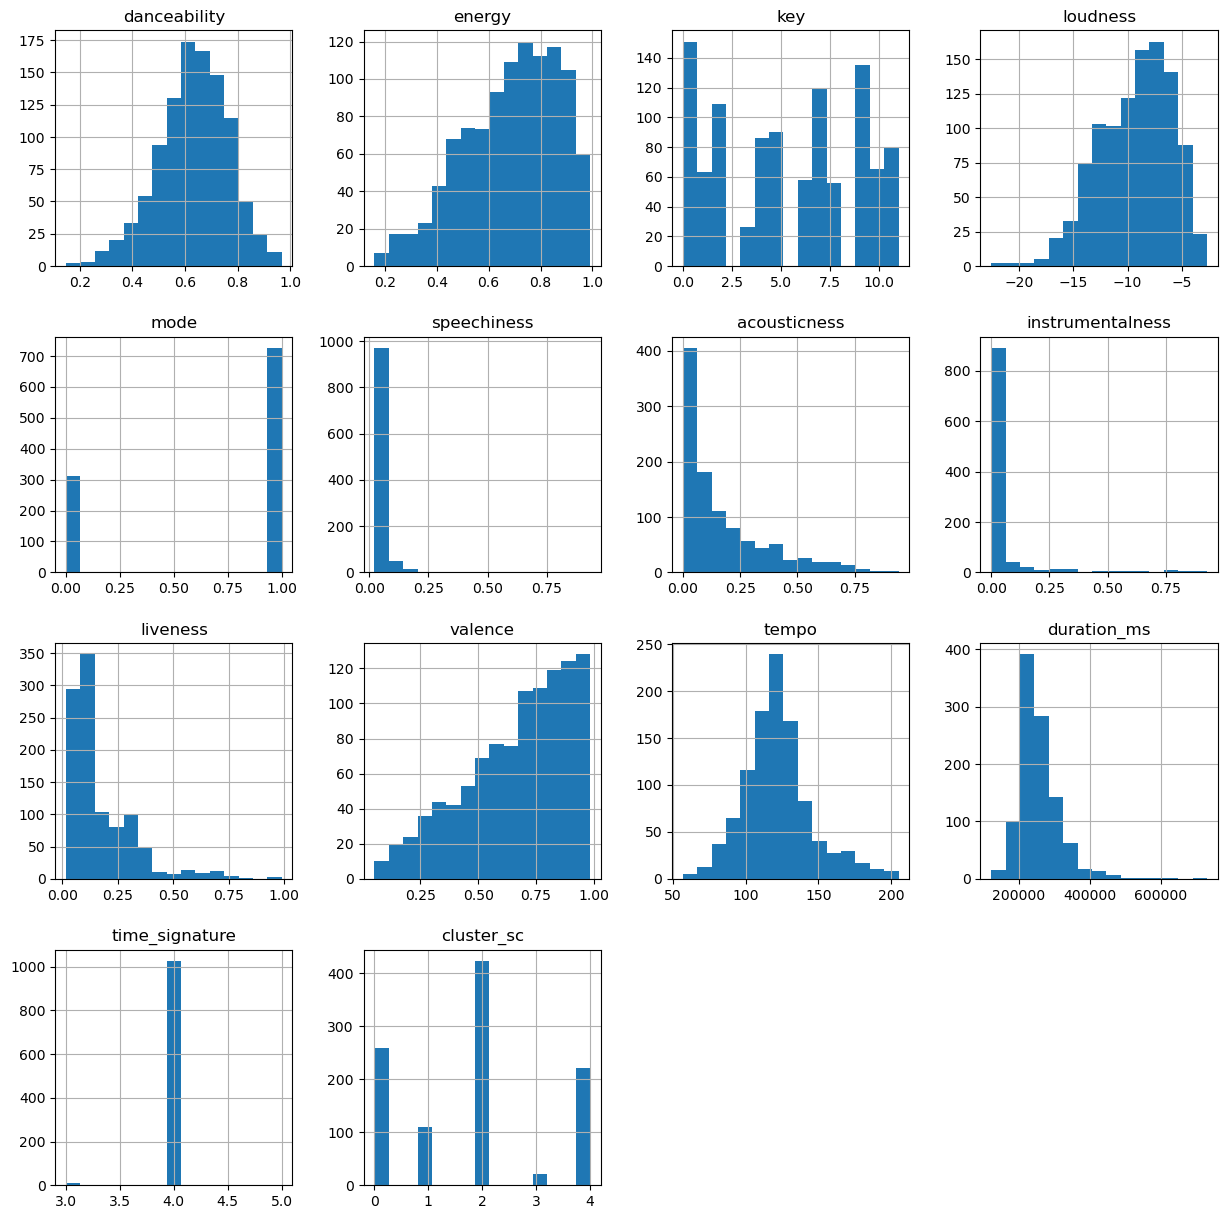

In [68]:
#we compare with the original no scaled checking if more or less has the same pattern
cluster_df.hist(bins=15,figsize=(15,15));

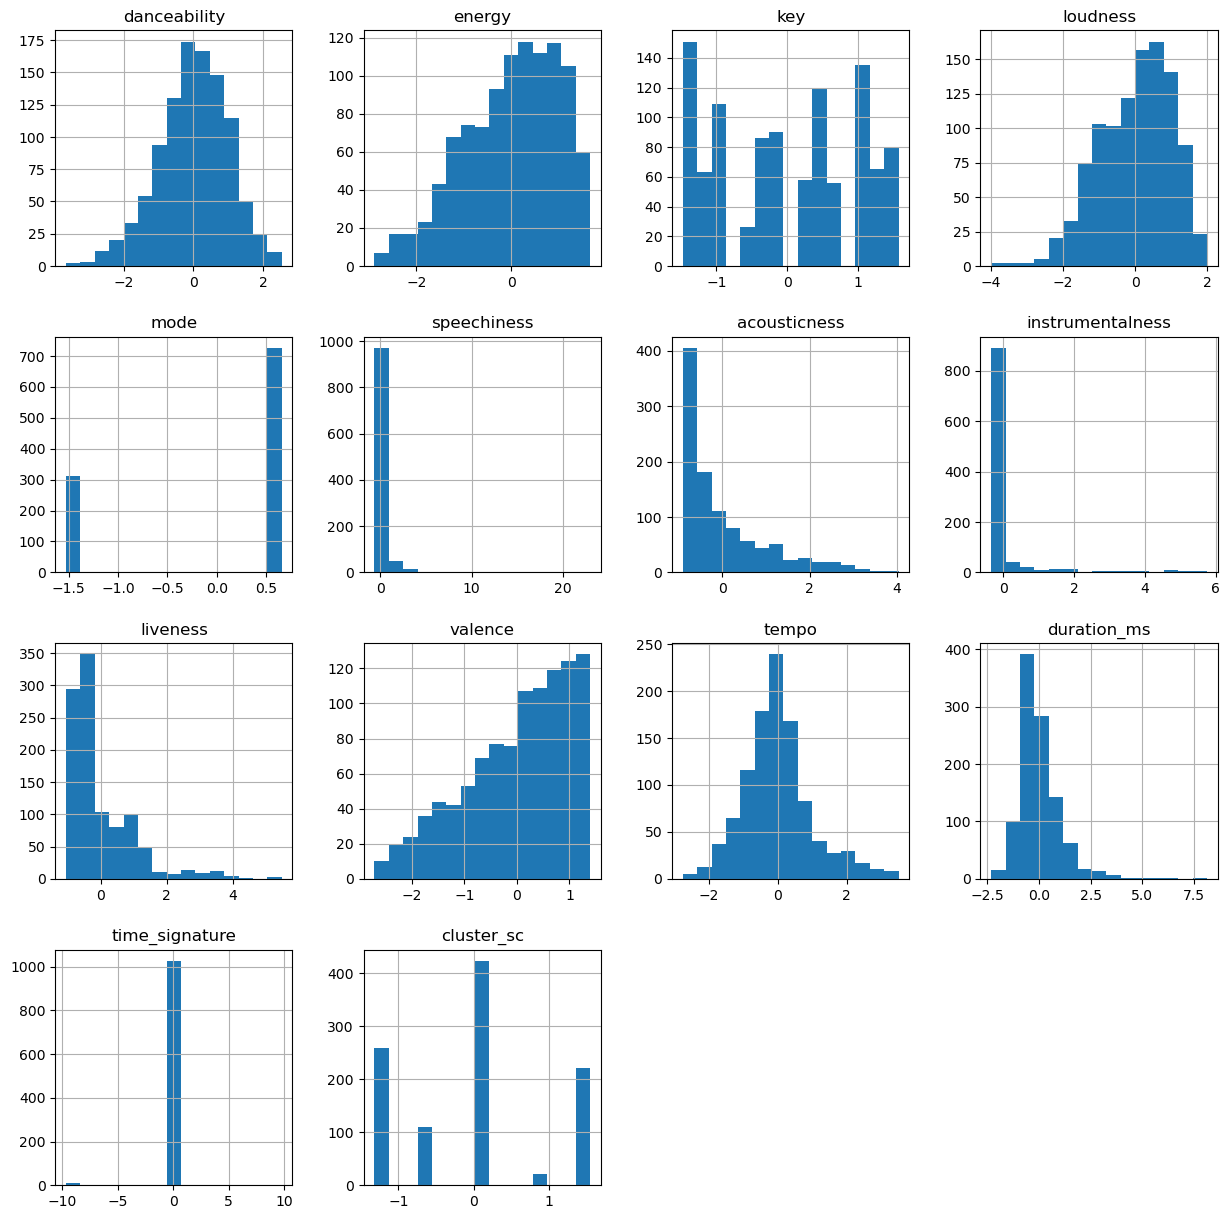

In [69]:
cluster_scaled_df.hist(bins=15,figsize=(15,15));


In [70]:
K_Means=KMeans(n_clusters=5, random_state=5)
cluster_model_scaled=K_Means.fit(cluster_scaled_df)
cluster_model_scaled.cluster_centers_

array([[ 2.89581896e-01,  5.46940543e-02,  4.17601529e-01,
        -6.95351942e-03, -1.52542554e+00, -1.32050904e-03,
        -2.82265645e-01, -1.82058901e-01, -8.78292694e-02,
         1.66362167e-01, -9.98459236e-02,  3.32947877e-01,
         6.56503290e-02, -4.24509480e-01],
       [ 1.31020391e-01,  1.92491667e-01, -2.68145615e-01,
         1.40799936e-01,  6.49393816e-01, -4.31677002e-02,
        -2.82378490e-01, -1.87842308e-01,  1.00597417e-01,
         2.21780647e-01, -1.39654087e-01,  2.99184437e-01,
         9.31503457e-02, -4.96555762e-01],
       [-5.46402362e-01, -1.40028282e+00,  5.97986686e-02,
        -8.45540860e-01,  2.49790997e-01, -2.85082387e-01,
         1.25901558e+00, -2.13909856e-01, -2.43217217e-01,
        -1.25066534e+00, -3.85164302e-01,  1.80772710e-01,
        -3.30541773e-01, -1.73707169e-01],
       [ 2.66173421e-01,  4.52459628e-01, -3.33769930e-02,
         1.46047108e-01,  2.10456753e-01,  2.36847884e-01,
        -4.22455606e-01,  4.03542728e+00,  1.

In [71]:
cluster_model_scaled.labels_


array([1, 1, 1, ..., 1, 4, 2], dtype=int32)

In [72]:
cluster_scaled_df['cluster_sc']=cluster_model_scaled.labels_


In [73]:
cluster_scaled_df['cluster_sc'].value_counts()


1    354
4    241
0    222
2    172
3     49
Name: cluster_sc, dtype: int64

In [74]:
cluster_scaled_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_sc
0,0.395849,-0.297509,1.017337,0.605652,0.655555,-0.221964,-0.834617,-0.334815,-0.530878,0.278454,0.391429,1.033764,0.06565,1
1,0.778898,0.824874,-1.473872,0.703658,0.655555,0.679276,-0.825154,0.064007,-0.854350,0.537633,-0.037437,0.138089,0.06565,1
2,0.230612,-0.319409,-0.920270,-1.024181,0.655555,-0.524967,-0.466612,-0.076613,-0.453541,-0.086155,-0.457730,0.068207,0.06565,1
3,0.433403,-0.806687,-0.366668,-0.370510,0.655555,-0.377350,0.239958,-0.292340,-0.386291,0.423419,-0.307553,-0.584953,0.06565,1
4,-0.460378,0.326646,-0.366668,0.386863,0.655555,-0.506839,-0.553882,-0.335394,-0.480441,-0.288227,-1.103585,0.131923,0.06565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.339137,1.449028,1.017337,0.102436,0.655555,0.189809,-0.827257,-0.218547,-0.204717,-0.345335,0.318832,-1.990136,0.06565,4
1034,-0.542996,0.080269,1.570939,-0.158913,0.655555,-0.113194,-0.577539,-0.335511,-0.520118,0.792420,0.200076,-1.292906,0.06565,4
1035,-0.820895,0.551122,-0.366668,-0.069599,0.655555,-0.338504,-0.865424,-0.335422,0.622456,-0.086155,0.855813,-0.279389,0.06565,1
1036,-0.137415,1.262877,1.017337,0.644615,-1.525426,0.355554,-0.631688,0.223026,-0.594766,0.291632,0.153156,-1.094683,0.06565,4


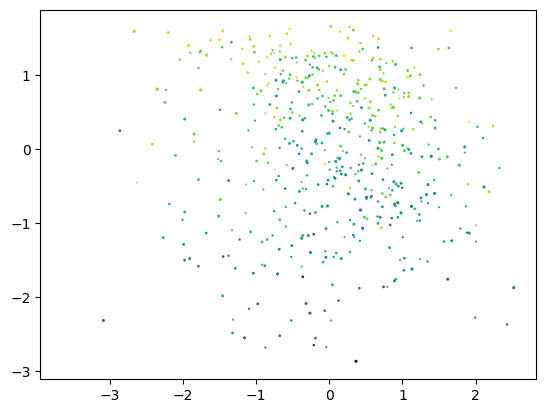

In [75]:
plt.scatter(cluster_scaled_df.iloc[:,0], cluster_scaled_df.iloc[:,1], cluster_scaled_df.iloc[:,2], cluster_scaled_df.iloc[:,3]);


In [76]:
cluster_scaled_df=cluster_scaled_df.drop('cluster_sc',axis=1)


In [77]:
K=range(5,18)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(cluster_scaled_df)
    inertia.append(kmeans.inertia_)

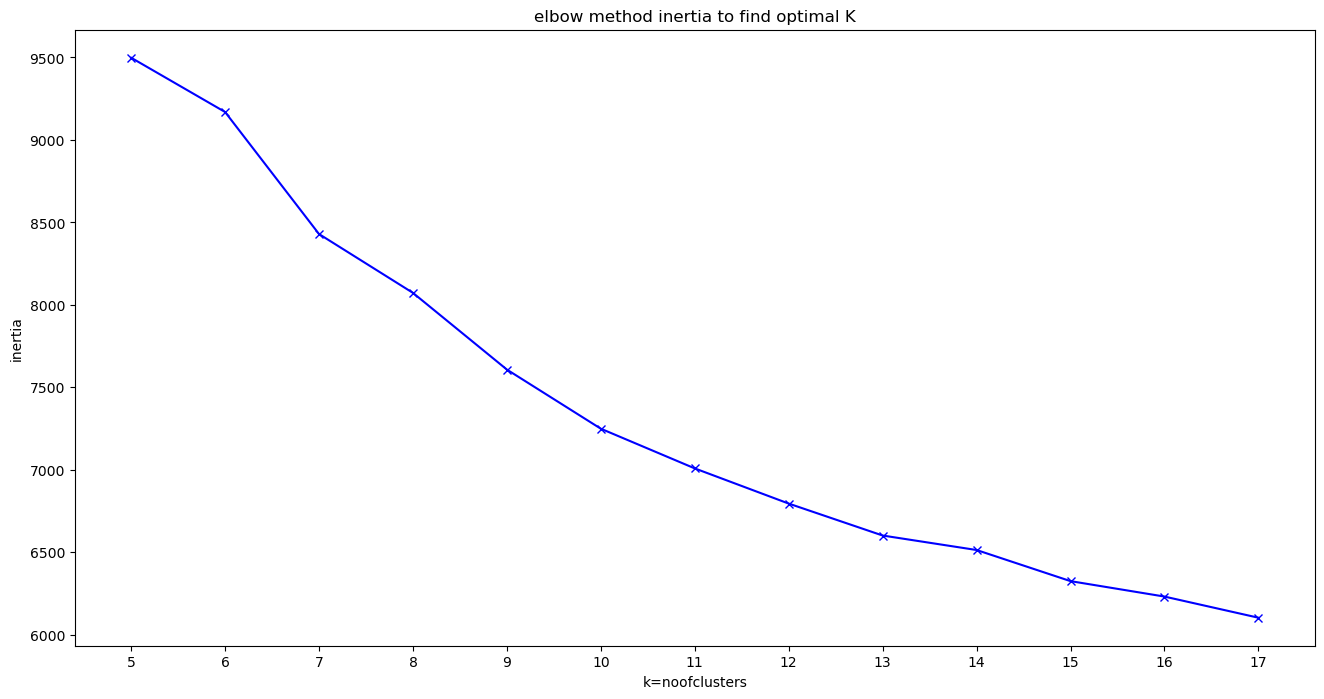

In [78]:
#plot the resulting inertia - elbow 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

In [79]:
K=range(5,18)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(cluster_scaled_df)
    sil.append(silhouette_score(cluster_scaled_df,kmeans.predict(cluster_scaled_df)))

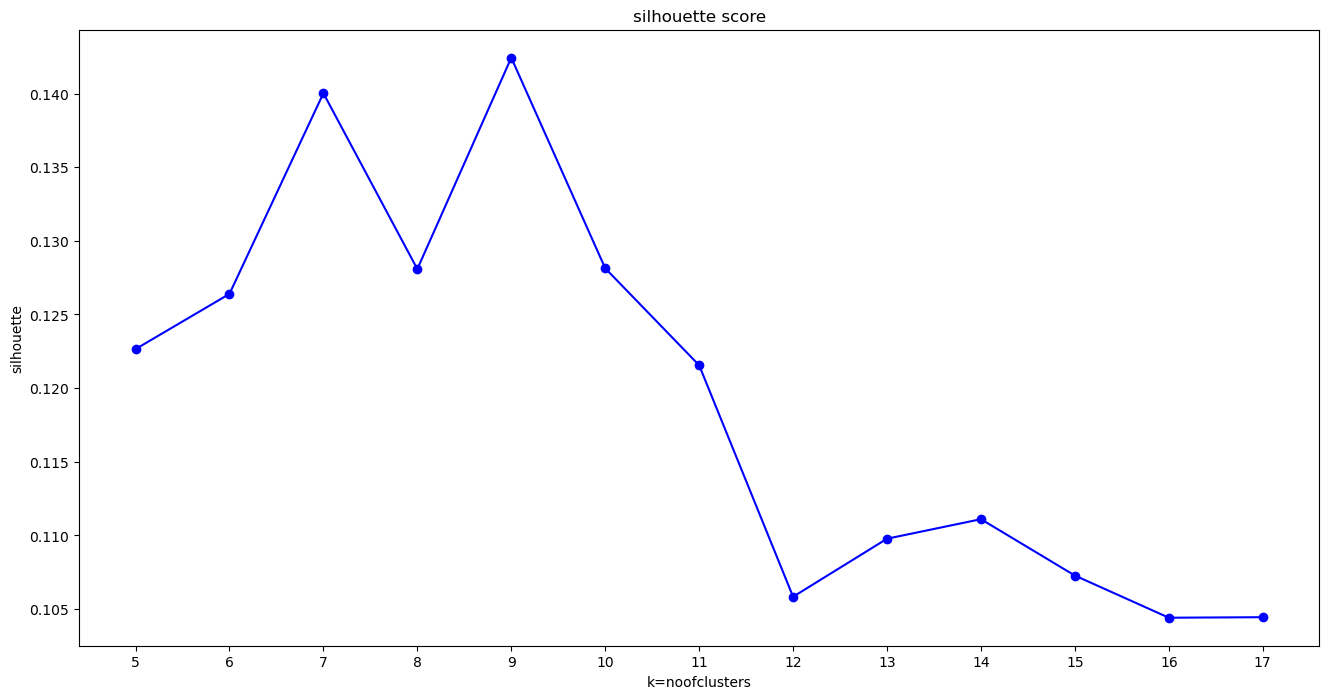

In [80]:

plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette score');# We choose the K = 10 to redo the cluster


In [81]:
# We choose the K = 10 to redo the cluster


In [82]:

kmeans=KMeans(n_clusters=9, random_state=5)
ClMo=kmeans.fit(cluster_scaled_df)
cluster_scaled_df['cluster_final']=ClMo.labels_
cluster_scaled_df['cluster_final'].value_counts()


1    345
8    214
2    169
3    155
4     54
5     48
0     43
6      9
7      1
Name: cluster_final, dtype: int64

In [83]:
cluster_scaled_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_final
0,0.395849,-0.297509,1.017337,0.605652,0.655555,-0.221964,-0.834617,-0.334815,-0.530878,0.278454,0.391429,1.033764,0.06565,1
1,0.778898,0.824874,-1.473872,0.703658,0.655555,0.679276,-0.825154,0.064007,-0.854350,0.537633,-0.037437,0.138089,0.06565,1
2,0.230612,-0.319409,-0.920270,-1.024181,0.655555,-0.524967,-0.466612,-0.076613,-0.453541,-0.086155,-0.457730,0.068207,0.06565,1
3,0.433403,-0.806687,-0.366668,-0.370510,0.655555,-0.377350,0.239958,-0.292340,-0.386291,0.423419,-0.307553,-0.584953,0.06565,1
4,-0.460378,0.326646,-0.366668,0.386863,0.655555,-0.506839,-0.553882,-0.335394,-0.480441,-0.288227,-1.103585,0.131923,0.06565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-1.339137,1.449028,1.017337,0.102436,0.655555,0.189809,-0.827257,-0.218547,-0.204717,-0.345335,0.318832,-1.990136,0.06565,2
1034,-0.542996,0.080269,1.570939,-0.158913,0.655555,-0.113194,-0.577539,-0.335511,-0.520118,0.792420,0.200076,-1.292906,0.06565,1
1035,-0.820895,0.551122,-0.366668,-0.069599,0.655555,-0.338504,-0.865424,-0.335422,0.622456,-0.086155,0.855813,-0.279389,0.06565,2
1036,-0.137415,1.262877,1.017337,0.644615,-1.525426,0.355554,-0.631688,0.223026,-0.594766,0.291632,0.153156,-1.094683,0.06565,8


In [84]:
playlist_features


,title,artist,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,0.685,0.633,9,-7.259,1,0.0377,0.01360,0.000106,0.0935,0.731,131.397,audio_features,spotify:track:7pSzRRMaPXA39wvrnvdmSH,https://api.spotify.com/v1/tracks/7pSzRRMaPXA3...,https://api.spotify.com/v1/audio-analysis/7pSz...,317240,4
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,0.736,0.838,0,-6.932,1,0.0725,0.01540,0.060800,0.0454,0.790,121.242,audio_features,spotify:track:07zkNvtcmPOFlMOXbma13k,https://api.spotify.com/v1/tracks/07zkNvtcmPOF...,https://api.spotify.com/v1/audio-analysis/07zk...,264947,4
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,0.663,0.629,2,-12.697,1,0.0260,0.08360,0.039400,0.1050,0.648,111.290,audio_features,spotify:track:603aPXFY2Ec2WuFganUGuD,https://api.spotify.com/v1/tracks/603aPXFY2Ec2...,https://api.spotify.com/v1/audio-analysis/603a...,260867,4
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,0.690,0.540,4,-10.516,1,0.0317,0.21800,0.006570,0.1150,0.764,114.846,audio_features,spotify:track:6i8ecOsx4J2Px1maiqzqoG,https://api.spotify.com/v1/tracks/6i8ecOsx4J2P...,https://api.spotify.com/v1/audio-analysis/6i8e...,222733,4
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,0.571,0.747,4,-7.989,1,0.0267,0.06700,0.000018,0.1010,0.602,95.997,audio_features,spotify:track:7oWqXVRExRlNR0jZJNoO9w,https://api.spotify.com/v1/tracks/7oWqXVRExRlN...,https://api.spotify.com/v1/audio-analysis/7oWq...,264587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,0.454,0.952,9,-8.938,1,0.0536,0.01500,0.017800,0.1420,0.589,129.678,audio_features,spotify:track:2QlYQQ8JpZf8mAk7PWcXsB,https://api.spotify.com/v1/tracks/2QlYQQ8JpZf8...,https://api.spotify.com/v1/audio-analysis/2QlY...,140693,4
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,0.560,0.702,11,-9.810,1,0.0419,0.06250,0.000000,0.0951,0.848,126.866,audio_features,spotify:track:59JOneFVktVPSm0agaQWDo,https://api.spotify.com/v1/tracks/59JOneFVktVP...,https://api.spotify.com/v1/audio-analysis/59JO...,181400,4
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,0.523,0.788,4,-9.512,1,0.0332,0.00774,0.000014,0.2650,0.648,142.393,audio_features,spotify:track:7p1wyDdcnJuwQDodZh1Duq,https://api.spotify.com/v1/tracks/7p1wyDdcnJuw...,https://api.spotify.com/v1/audio-analysis/7p1w...,240573,4
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,0.614,0.918,9,-7.129,0,0.0600,0.05220,0.085000,0.0840,0.734,125.755,audio_features,spotify:track:7jgfLVXTBxufrbccakHQi1,https://api.spotify.com/v1/tracks/7jgfLVXTBxuf...,https://api.spotify.com/v1/audio-analysis/7jgf...,192973,4


In [85]:
playlist_names=playlist_features[['title','artist','song_id']]
cluster_final=cluster_scaled_df['cluster_final']
playlist_cluster=playlist_names.join(cluster_final)
playlist_cluster

,title,artist,song_id,cluster_final
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,1
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,1
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,1
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,1
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,1
...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,2
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,1
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,2
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,8


In [86]:
playlist_cluster


,title,artist,song_id,cluster_final
0,Original Sin,INXS,7pSzRRMaPXA39wvrnvdmSH,1
1,Sussudio,Phil Collins,07zkNvtcmPOFlMOXbma13k,1
2,Don't You (Forget About Me),Simple Minds,603aPXFY2Ec2WuFganUGuD,1
3,Everywhere,Fleetwood Mac,6i8ecOsx4J2Px1maiqzqoG,1
4,High & Dry,ABC,7oWqXVRExRlNR0jZJNoO9w,1
...,...,...,...,...
1033,If I Should Fall From Grace With God,The Pogues,2QlYQQ8JpZf8mAk7PWcXsB,2
1034,The Devil's Right Hand,Steve Earle,59JOneFVktVPSm0agaQWDo,1
1035,Europe After the Rain,John Foxx,7p1wyDdcnJuwQDodZh1Duq,2
1036,That's What You Always Say,The Dream Syndicate,7jgfLVXTBxufrbccakHQi1,8


In [87]:
def song_displayer(x):
    song_search=sp.search(q=lower_song, limit=1, market=None)
    song_search['tracks']['items'][0]['id']

    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_search['tracks']['items'][0]['id']}",
                            width="320",
                            height="80",
                            frameborder="0",
                            allowtransparency="true",
                            allow="encrypted-media",))

In [88]:
# Import display and IFrame from IPython.display
from IPython.display import display
from IPython.display import IFrame

# Get user input for the song they are searching for
lower_song = input("What song do you like?\n\n").lower()

# Convert songs and playlist_cluster DataFrames to lower case
df = songs.applymap(lambda s: s.lower() if type(s) == str else s)
playlist_cluster_lower = playlist_cluster.applymap(lambda s: s.lower() if type(s) == str else s)

# Find matches in the songs DataFrame
match_df = df[df['Song_title'].str.contains(lower_song)]

# Find matches in the playlist_cluster_lower DataFrame
match = playlist_cluster_lower[playlist_cluster_lower['title'].str.contains(lower_song)]

# Check if the song is present in either DataFrame
if lower_song in df['Song_title'].values or lower_song in playlist_cluster_lower['title'].values:
    # If the song is present in the songs DataFrame
    if len(match_df) > 0:
        question = input(f"\nIs this the song that you were looking for: {match_df.Song_title}{match_df.Artists} ? (y/n): ") 
        
        # If the user confirms this is the song they were searching for
        if question == 'y':
            print("\nCongrats! This is a hot song from the Billboard Top 100.")
            display(match_df[['Song_title','Artists']])
            print("Also we suggest you another random song:")
            random_song = songs[['Song_title', 'Artists']].sample(1)
            display(random_song)
        # If the user says no, this is not the song they were searching for
        elif question == 'n':
            print("\nSorry! This song is not in the the Billboard Top 100")
        # If the user inputs something other than 'y' or 'n'
        else:
            print("\nSorry! Please just write 'y' or 'n'")
    # If the song is present in the playlist_cluster_lower DataFrame
    elif len(match) == 0:
        question2 = input(f"\nIs this the song that you were looking for: {match.title}{match.artist} ? (y/n): ")
        
        # If the user confirms this is the song they were searching for
        if question2 == 'y':
            print("\nCongrats! This is a hot song from our database from Spotify list.")
            display(match[['title','artist']])
        # If the user says no, this is not the song they were searching for
        elif question2 == 'n':
            print("\nWe can not find the song, but we suggest you some similar songs based on the same audio features:")
            num_cluster = match['cluster_final']
            same_cluster_songs = playlist_cluster_lower[playlist_cluster_lower.cluster_final == int(num_cluster)].sample(5)
            display(same_cluster_songs[['title', 'artist']])
        else:
            print("\nSorry! just write 'y' or 'n'")
else:
    print("\nThe song does not match, try again")
    


what song do you like?

 Anti-hero

Is this the song that you where looking for: 0    anti-hero
Name: Song_title, dtype: object0    taylor swift
Name: Artists, dtype: object ? (y/n): y

Congrats! This is a hot song from the Billboard Top 100.


,Song_title,Artists
0,anti-hero,taylor swift


Also we suggest you another random song:


,Song_title,Artists
51,Hold Me Closer,Elton John & Britney Spears
